In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Chcemy przewidzieć cenę za m2
## Interesują nas mieszkania:
### - pokoje: maksymalnie 4
### - metraż: poniżej 80m2
### - cena: poniżej 850 tys.
### - lokalizacja: LSM, Czuby, Bronowice, Felin, Wrotków, Węglinek, Śródmieście, Czechów

In [2]:
df = pd.read_csv('data/results.csv', usecols=['meters', 'price', 'rooms', 'district'], na_values=['Zapytajocenę', 'EMPTY'])

In [3]:
df = df[df['meters'] < 80][df['rooms'] < 5][df['price'] < 850000]

/home/adsum/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [4]:
df = df[df['district'].isin(['LSM', 'Czuby', 'Bronowice', 'Felin', 'Wrotków', 'Węglinek', 'Śródmieście', 'Czechów']) ]
#subsetDataFrame = dfObj[dfObj['Product'].isin(['Mangos', 'Grapes']) ]

In [5]:
df['price'] = round(df['price'] / df['meters'])

In [6]:
df.rename(columns={'price': 'price_m2'}, inplace=True)

In [7]:
len(df)

1486

# Struktura danych

In [8]:
df

,meters,price_m2,rooms,district
1,59.48,5800.0,3.0,Czuby
2,53.41,6000.0,3.0,Czuby
3,70.00,9986.0,2.0,LSM
5,58.00,5431.0,2.0,LSM
6,63.00,6333.0,3.0,Czuby
...,...,...,...,...
2794,67.39,5701.0,3.0,Węglinek
2796,56.00,6232.0,2.0,Wrotków
2797,69.16,7519.0,3.0,Śródmieście
2798,68.50,5679.0,3.0,Czuby


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1486 entries, 1 to 2800
Data columns (total 4 columns):
meters      1486 non-null float64
price_m2    1486 non-null float64
rooms       1486 non-null float64
district    1486 non-null object
dtypes: float64(3), object(1)
memory usage: 58.0+ KB


In [10]:
df.dealer.fillna("EMPTY", inplace=True)

AttributeError: 'DataFrame' object has no attribute 'dealer'

In [12]:
#len(df[df.dealer == "EMPTY"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1486 entries, 1 to 2800
Data columns (total 4 columns):
meters      1486 non-null float64
price_m2    1486 non-null float64
rooms       1486 non-null float64
district    1486 non-null object
dtypes: float64(3), object(1)
memory usage: 58.0+ KB


In [17]:
#df['dealer'].value_counts()

In [18]:
#len(df['dealer'].value_counts())

In [19]:
df['district'].value_counts()

Węglinek       290
Czuby          278
Wrotków        261
Śródmieście    179
Bronowice      166
Felin          146
LSM            113
Czechów         53
Name: district, dtype: int64

In [20]:
len(df['district'].value_counts())

8

In [21]:
df.describe()

,meters,price_m2,rooms
count,1486.000000,1486.000000,1486.000000
mean,53.661561,6137.897712,2.580081
std,12.964916,1058.993489,0.776754
min,14.620000,2133.000000,1.000000
25%,45.750000,5514.750000,2.000000
50%,53.690000,5900.000000,3.000000
75%,62.860000,6408.500000,3.000000
max,79.950000,12996.000000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f615df73a58>,
      dtype=object)

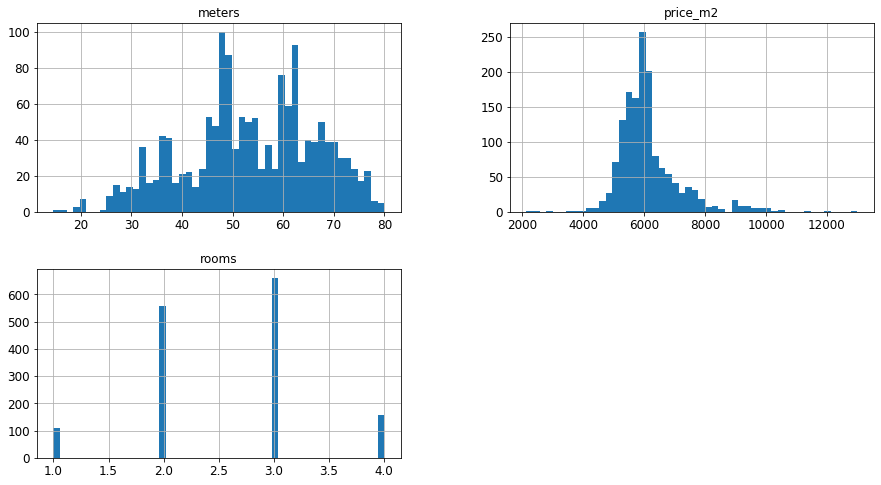

In [22]:
df.hist(bins=50, figsize=(15, 8))

# Zbiór testowy

In [23]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print("Uczące", len(train_set), ", testowe", len(test_set))

Uczące 1188 , testowe 298


### Atrybuty kategorii

In [24]:
df['meters_cat'] = np.ceil(df['meters'] / 1.5)
df['meters_cat'].where(df['meters_cat'] > 16, 16.0, inplace=True)
df['meters_cat'].where(df['meters_cat'] < 52, 52.0, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f615d9d7b00>,
      dtype=object)

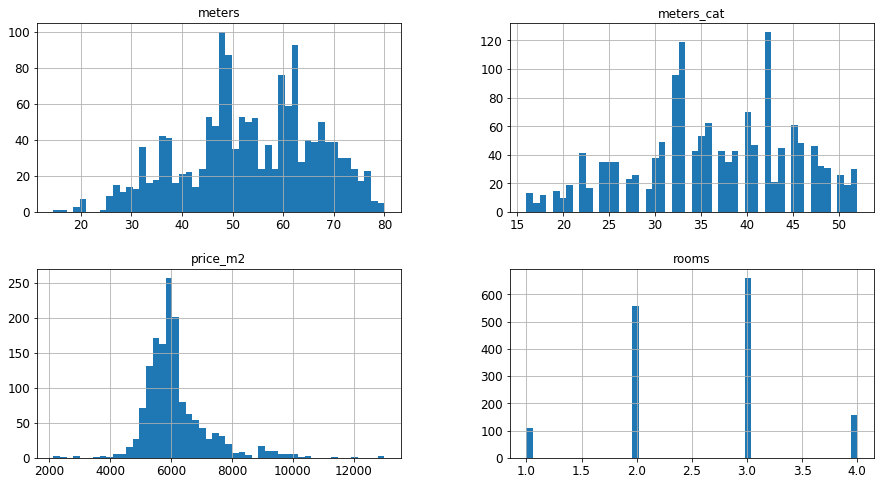

In [25]:
df.hist(bins=50, figsize=(15, 8))

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["meters_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

/home/adsum/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """
/home/adsum/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


In [27]:
df['meters_cat'].value_counts() / len(strat_test_set)

42.0    0.422819
33.0    0.399329
32.0    0.322148
40.0    0.234899
36.0    0.208054
45.0    0.204698
35.0    0.177852
31.0    0.164430
46.0    0.161074
41.0    0.157718
47.0    0.154362
44.0    0.151007
37.0    0.144295
34.0    0.144295
39.0    0.144295
22.0    0.137584
30.0    0.127517
26.0    0.117450
24.0    0.117450
25.0    0.117450
38.0    0.117450
48.0    0.107383
49.0    0.104027
52.0    0.100671
28.0    0.087248
50.0    0.087248
27.0    0.077181
43.0    0.070470
21.0    0.063758
51.0    0.063758
23.0    0.057047
29.0    0.053691
19.0    0.050336
16.0    0.043624
18.0    0.040268
20.0    0.033557
17.0    0.020134
Name: meters_cat, dtype: float64

In [28]:
df['meters_cat'].value_counts() / len(df)

42.0    0.084791
33.0    0.080081
32.0    0.064603
40.0    0.047106
36.0    0.041723
45.0    0.041050
35.0    0.035666
31.0    0.032974
46.0    0.032301
41.0    0.031629
47.0    0.030956
44.0    0.030283
37.0    0.028937
34.0    0.028937
39.0    0.028937
22.0    0.027591
30.0    0.025572
26.0    0.023553
24.0    0.023553
25.0    0.023553
38.0    0.023553
48.0    0.021534
49.0    0.020861
52.0    0.020188
28.0    0.017497
50.0    0.017497
27.0    0.015478
43.0    0.014132
21.0    0.012786
51.0    0.012786
23.0    0.011440
29.0    0.010767
19.0    0.010094
16.0    0.008748
18.0    0.008075
20.0    0.006729
17.0    0.004038
Name: meters_cat, dtype: float64

In [29]:
def income_cat_proportions(data):
    return data["meters_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Łącznie": income_cat_proportions(df),
    "L. warstwowe": income_cat_proportions(strat_test_set),
    "Losowe": income_cat_proportions(test_set),
}).sort_index()
compare_props["Błąd - losowe (%)"] = 100 * compare_props["Losowe"] / compare_props["Łącznie"] - 100
compare_props["Błąd - l. warstwowe (%)"] = 100 * compare_props["L. warstwowe"] / compare_props["Łącznie"] - 100

In [30]:
compare_props

,Łącznie,L. warstwowe,Losowe,Błąd - losowe (%),Błąd - l. warstwowe (%)
16.0,0.008748,0.006711,0.016779,91.791430,-23.283428
17.0,0.004038,NaN,NaN,NaN,NaN
18.0,0.008075,0.003356,0.013423,66.219239,-58.445190
19.0,0.010094,NaN,0.013423,32.975391,NaN
20.0,0.006729,NaN,0.016779,149.328859,NaN
21.0,0.012786,0.003356,0.003356,-73.754857,-73.754857
22.0,0.027591,0.006711,0.036913,33.786217,-75.675233
23.0,0.011440,0.010067,0.003356,-70.667193,-12.001579
24.0,0.023553,0.020134,0.023490,-0.268456,-14.515820
25.0,0.023553,0.013423,0.026846,13.978907,-43.010547


In [31]:
df.rename(columns={'price': 'price_m2'})

,meters,price_m2,rooms,district,meters_cat
1,59.48,5800.0,3.0,Czuby,40.0
2,53.41,6000.0,3.0,Czuby,36.0
3,70.00,9986.0,2.0,LSM,47.0
5,58.00,5431.0,2.0,LSM,39.0
6,63.00,6333.0,3.0,Czuby,42.0
...,...,...,...,...,...
2794,67.39,5701.0,3.0,Węglinek,45.0
2796,56.00,6232.0,2.0,Wrotków,38.0
2797,69.16,7519.0,3.0,Śródmieście,47.0
2798,68.50,5679.0,3.0,Czuby,46.0


In [32]:
for set_ in strat_train_set, strat_test_set:
    set_.drop("meters_cat", axis=1, inplace=True)

In [33]:
strat_train_set

,meters,price_m2,rooms,district
137,61.30,5150.0,3.0,Felin
755,NaN,NaN,NaN,NaN
505,NaN,NaN,NaN,NaN
1136,NaN,NaN,NaN,NaN
1436,39.93,5550.0,2.0,Czuby
...,...,...,...,...
1483,37.72,6050.0,2.0,Węglinek
715,52.40,7595.0,2.0,Czuby
1225,NaN,NaN,NaN,NaN
1029,NaN,NaN,NaN,NaN


In [34]:
df.head()

,meters,price_m2,rooms,district,meters_cat
1,59.48,5800.0,3.0,Czuby,40.0
2,53.41,6000.0,3.0,Czuby,36.0
3,70.00,9986.0,2.0,LSM,47.0
5,58.00,5431.0,2.0,LSM,39.0
6,63.00,6333.0,3.0,Czuby,42.0


# Wizualizacja

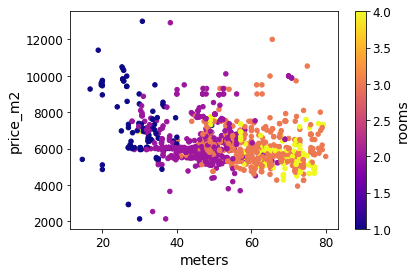

In [35]:
df.plot(kind="scatter", x="meters", y="price_m2", alpha=1,
       c="rooms", cmap=plt.get_cmap("plasma"), colorbar=True,  sharex=False)

# Korelacja

In [36]:
corr_df = df.corr()

In [37]:
corr_df["price_m2"].sort_values(ascending=False)

price_m2      1.000000
rooms        -0.286705
meters_cat   -0.294614
meters       -0.297179
Name: price_m2, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6159718630>,
      dtype=object)

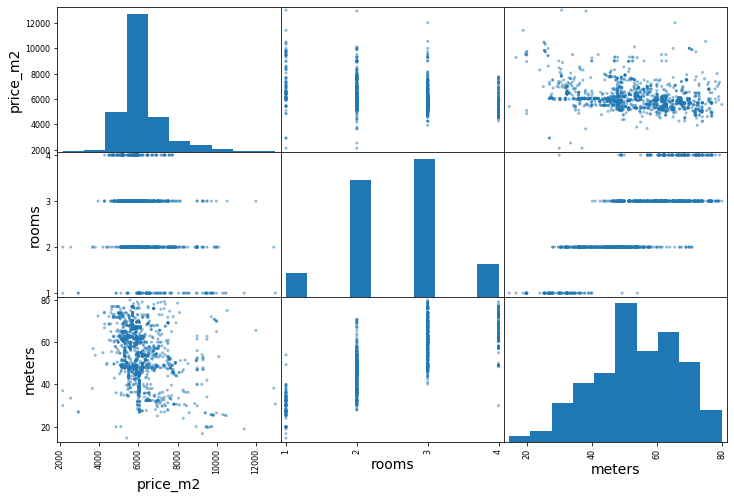

In [38]:
from pandas.plotting import scatter_matrix

attributes = ["price_m2", "rooms", "meters"]
scatter_matrix(df[attributes], figsize=(12, 8))

# Kombinacje atrybutów

In [39]:
df['meters_by_rooms'] = df['meters'] / df['rooms']
df['rooms_by_meter'] = df['rooms'] / df['meters']

In [40]:
corr_df = df.corr()
corr_df["price_m2"].sort_values(ascending=False)

price_m2           1.000000
meters_by_rooms    0.119593
rooms_by_meter    -0.065290
rooms             -0.286705
meters_cat        -0.294614
meters            -0.297179
Name: price_m2, dtype: float64

# Przygotowanie danych pod algorytmy

In [43]:
#df = strat_train_set.drop("price_m2", axis=1)
#df_labels = strat_train_set["price_m2"].copy()
df = train_set.drop("price_m2", axis=1)
df_labels = train_set["price_m2"].copy()

In [47]:
#df_num = df.select_dtypes(include=[np.number]
df_num = df.drop(['district', 'meters'], axis=1)

In [48]:
df_num

,rooms,meters_cat
2326,3.0,42.0
2599,2.0,35.0
1792,3.0,42.0
779,4.0,52.0
1177,2.0,28.0
...,...,...
2133,2.0,33.0
2466,3.0,34.0
1603,2.0,26.0
2762,3.0,42.0


# Atrybuty kategorialne dla tekstu

In [50]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
#dealer_cat = df['dealer']

In [52]:
#dealer_cat_encoded, dealer_categories = dealer_cat.factorize()
#dealer_cat_encoded[:10]

In [53]:
#dealer_categories

In [54]:
# encoder1 = OneHotEncoder(categories='auto')
# dealer_cat_1hot = encoder1.fit_transform(dealer_cat_encoded.reshape(-1,1))
# dealer_cat_1hot

In [55]:
#dealer_cat_1hot.toarray()

In [56]:
district_cat = df['district']

In [57]:
district_cat_encoded, district_categories = district_cat.factorize()
district_cat_encoded[:10]

array([0, 1, 1, 2, 0, 3, 1, 3, 1, 4])

In [58]:
district_categories

Index(['Węglinek', 'Bronowice', 'Felin', 'Wrotków', 'Czuby', 'Śródmieście',
       'LSM', 'Czechów'],
      dtype='object')

In [59]:
encoder2 = OneHotEncoder(categories='auto')
district_cat_1hot = encoder2.fit_transform(district_cat_encoded.reshape(-1,1))
district_cat_1hot

<1188x8 sparse matrix of type '<class 'numpy.float64'>'
	with 1188 stored elements in Compressed Sparse Row format>

In [60]:
district_cat_1hot.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
  

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("Należy wybrać jedno z następujących kodowań: 'onehot', 'onehot-dense' "
                        "lub 'ordinal', wybrano %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("Należy wybrać jedną z następujących wartości parametru handle_unknown: 'error' lub "
                        "'ignore', wybrano %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("Wartość handle_unknown='ignore' nie jest obsługiwana przez parametr"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Znaleziono nieznane kategorie {0} w kolumnie {1}"
                               " podczas dopasowywania".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):

        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Znaleziono nieznane kategorie {0} w kolumnie {1}"
                           " podczas przekształcania".format(diff, i))
                    raise ValueError(msg)
                else:
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [62]:
# encoder1 = CategoricalEncoder()
# dealer_cat_reshaped = dealer_cat.values.reshape(-1, 1)
# housing_cat_1hot = encoder1.fit_transform(dealer_cat_reshaped)
# housing_cat_1hot

In [65]:
encoder2 = CategoricalEncoder()
district_cat_reshaped = district_cat.values.reshape(-1, 1)
district_cat_1hot = encoder2.fit_transform(district_cat_reshaped)
district_cat_1hot

<1188x8 sparse matrix of type '<class 'numpy.float64'>'
	with 1188 stored elements in Compressed Sparse Row format>

In [66]:
df_num

,rooms,meters_cat
2326,3.0,42.0
2599,2.0,35.0
1792,3.0,42.0
779,4.0,52.0
1177,2.0,28.0
...,...,...
2133,2.0,33.0
2466,3.0,34.0
1603,2.0,26.0
2762,3.0,42.0


In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

df_num_tr = num_pipeline.fit_transform(df_num)

In [68]:
df_num_tr

array([[ 0.53588634,  0.67849811],
       [-0.75545844, -0.1470162 ],
       [ 0.53588634,  0.67849811],
       ...,
       [-0.75545844, -1.20839173],
       [ 0.53588634,  0.67849811],
       [ 1.82723112,  1.15022057]])

In [69]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [75]:
num_attribs = list(df_num)
cat_attribs = ["district"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('encoder2', CategoricalEncoder(encoding="onehot-dense"))
    ])

In [76]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [77]:
df_prepared = full_pipeline.fit_transform(df)
df_prepared

array([[ 0.53588634,  0.67849811,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.75545844, -0.1470162 ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53588634,  0.67849811,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.75545844, -1.20839173,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53588634,  0.67849811,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.82723112,  1.15022057,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

In [78]:
df_prepared.shape

(1188, 10)

# Uczenie modelu

In [79]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
# Przetestujmy pełen potok na kilku próbkach uczących
some_data = df.iloc[:5]
some_labels = df_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Prognozy:", lin_reg.predict(some_data_prepared))

Prognozy: [5845.39573874 5602.57179117 5317.93139648 4772.50785349 6309.17216521]


### Porównanie wyników z rzeczywistymi wartościami

In [81]:
print("Etykiety:", list(some_labels))

Etykiety: [6100.0, 5534.0, 5450.0, 4900.0, 6050.0]


In [82]:
some_data_prepared

array([[ 0.53588634,  0.67849811,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [-0.75545844, -0.1470162 ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.53588634,  0.67849811,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.82723112,  1.85780426,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.75545844, -0.9725305 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ]])

In [83]:
from sklearn.metrics import mean_squared_error

df_predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

816.4553528353712

In [84]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(df_labels, df_predictions)
lin_mae

528.0607587499796

In [85]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(df_prepared, df_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [86]:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=1e-07, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [87]:
df_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

494.4244246468303

In [88]:
tre_mae = mean_absolute_error(df_labels, df_predictions)
tre_mae

264.84142013707736

# Regulowanie modelu

### Sprawdzian krzyżowy

In [89]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [90]:
def display_scores(scores):
    print("Wyniki:", scores)
    print("Średnia:", scores.mean())
    print("Odchylenie standardowe:", scores.std())

display_scores(tree_rmse_scores)

Wyniki: [ 791.61276786 1003.14885227  950.19040916  858.68231743  689.1428367
  693.64244988  816.89215707  763.5857323   707.73506421  729.12879746]
Średnia: 800.3761384332954
Odchylenie standardowe: 102.9986840380911


In [91]:
lin_scores = cross_val_score(lin_reg, df_prepared, df_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Wyniki: [820.27912855 925.35079897 861.95109377 949.23982996 765.82647291
 687.55360921 958.72392917 749.84991401 827.32301823 669.49926587]
Średnia: 821.5597060667076
Odchylenie standardowe: 98.42949150086984


In [92]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(df_prepared, df_labels)

/home/adsum/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [93]:
df_predictions = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_labels, df_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

531.5559532230435

In [94]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Wyniki: [741.26756037 975.32921901 859.62592304 837.9043327  569.47789053
 566.14067915 852.98741942 658.58119729 704.41332285 745.68198974]
Średnia: 751.1409534091615
Odchylenie standardowe: 125.71180838223492


In [95]:
scores = cross_val_score(lin_reg, df_prepared, df_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count     10.000000
mean     821.559706
std      103.753794
min      669.499266
25%      753.844054
50%      823.801073
75%      909.500873
max      958.723929
dtype: float64

In [96]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(df_prepared, df_labels)
df_predictions = svm_reg.predict(df_prepared)
svm_mse = mean_squared_error(df_labels, df_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

1026.03728856283

### Metoda przeszukiwania siatki

In [98]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [5, 15, 25, 40, 60], 'max_features': [2, 3, 4, 6, 8, 9, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(df_prepared, df_labels)

/home/adsum/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 3, 4, 6, 8, 

In [99]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 60}

In [100]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=60,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [101]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

787.233707405257 {'max_features': 2, 'n_estimators': 5}
782.5029205418655 {'max_features': 2, 'n_estimators': 15}
776.6943845846799 {'max_features': 2, 'n_estimators': 25}
774.6909154717682 {'max_features': 2, 'n_estimators': 40}
772.9628391486407 {'max_features': 2, 'n_estimators': 60}
793.0278839230915 {'max_features': 3, 'n_estimators': 5}
781.1733245691657 {'max_features': 3, 'n_estimators': 15}
776.2956955642387 {'max_features': 3, 'n_estimators': 25}
775.0843468111201 {'max_features': 3, 'n_estimators': 40}
774.0570836702078 {'max_features': 3, 'n_estimators': 60}
791.7320677627945 {'max_features': 4, 'n_estimators': 5}
785.3884842521962 {'max_features': 4, 'n_estimators': 15}
779.0289510790104 {'max_features': 4, 'n_estimators': 25}
775.8342084337527 {'max_features': 4, 'n_estimators': 40}
774.1179068623428 {'max_features': 4, 'n_estimators': 60}
794.3023079363188 {'max_features': 6, 'n_estimators': 5}
785.4242750731107 {'max_features': 6, 'n_estimators': 15}
776.1301522777322 {

In [102]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021290,0.000928,0.002926,0.000474,2,5,NaN,"{'max_features': 2, 'n_estimators': 5}",-757685.953537,-743654.296283,...,-619736.910075,126270.371969,30,-272923.910734,-276636.056754,-312046.526506,-263124.885409,-291319.298109,-283210.135503,17027.848760
1,0.054851,0.003187,0.004220,0.000649,2,15,NaN,"{'max_features': 2, 'n_estimators': 15}",-765465.194831,-783287.425189,...,-612310.820657,149852.540904,26,-256382.569749,-259178.102258,-300295.816628,-258458.586300,-285904.743627,-272043.963712,17808.203415
2,0.086484,0.000276,0.005573,0.000071,2,25,NaN,"{'max_features': 2, 'n_estimators': 25}",-743953.542260,-786156.946723,...,-603254.167045,150545.219485,18,-253487.111276,-251878.530447,-289992.836632,-247723.561473,-272659.704975,-263148.348960,15933.391375
3,0.145107,0.011535,0.008448,0.000352,2,40,NaN,"{'max_features': 2, 'n_estimators': 40}",-728687.658308,-779514.894636,...,-600146.014514,146073.372059,9,-251816.058662,-243398.493126,-282288.113615,-241509.910467,-268966.352359,-257595.785646,15701.748865
4,0.207785,0.001168,0.011535,0.000139,2,60,NaN,"{'max_features': 2, 'n_estimators': 60}",-724763.804338,-777381.388038,...,-597471.550705,147181.065329,4,-251843.048607,-241633.938407,-280592.636546,-238670.699476,-264622.266437,-255472.517894,15503.023519
5,0.019657,0.000123,0.002297,0.000052,3,5,NaN,"{'max_features': 3, 'n_estimators': 5}",-747218.376928,-733046.509210,...,-628893.224680,110961.286465,34,-270990.073748,-276051.850250,-314764.281423,-262278.912336,-298427.331206,-284502.489792,19274.663847
6,0.054067,0.000256,0.003869,0.000040,3,15,NaN,"{'max_features': 3, 'n_estimators': 15}",-742859.368278,-777297.890178,...,-610231.763018,138734.219023,24,-254684.902333,-259603.813936,-299639.782820,-254993.884663,-284362.752982,-270657.027347,18168.452730
7,0.089669,0.002334,0.005689,0.000254,3,25,NaN,"{'max_features': 3, 'n_estimators': 25}",-732688.028600,-783551.691938,...,-602635.006952,144715.020311,15,-254148.367962,-252010.230817,-289417.056437,-246027.699318,-271765.666431,-262673.804193,15883.017139
8,0.139959,0.000160,0.008047,0.000194,3,40,NaN,"{'max_features': 3, 'n_estimators': 40}",-716416.578052,-779473.150931,...,-600755.744672,139741.405228,10,-252489.928648,-244409.456000,-282177.460997,-240325.040278,-268602.131719,-257600.803529,15643.695227
9,0.209185,0.001097,0.011317,0.000104,3,60,NaN,"{'max_features': 3, 'n_estimators': 60}",-712326.535242,-782786.027362,...,-599164.368780,142427.000384,7,-251729.135674,-242429.440586,-280501.227327,-237678.739386,-264880.673504,-255443.843295,15592.940110


In [108]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=10),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(df_prepared, df_labels)

/home/adsum/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [109]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

768.0686847935979 {'max_features': 7, 'n_estimators': 180}
769.2798596602752 {'max_features': 8, 'n_estimators': 189}
766.354784198574 {'max_features': 5, 'n_estimators': 103}
771.2789231685879 {'max_features': 3, 'n_estimators': 75}
767.704250283334 {'max_features': 8, 'n_estimators': 117}
769.1566483482527 {'max_features': 4, 'n_estimators': 104}
767.4634812491306 {'max_features': 8, 'n_estimators': 131}
771.9872673292579 {'max_features': 6, 'n_estimators': 53}
769.0520155831921 {'max_features': 2, 'n_estimators': 88}
767.4885238363686 {'max_features': 6, 'n_estimators': 130}


In [110]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.09572693, 0.49363791, 0.03303192, 0.00576048, 0.0227326 ,
       0.05301331, 0.04108814, 0.01178661, 0.01139488, 0.23182722])

In [111]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("price_m2", axis=1)
y_test = test_set["price_m2"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [112]:
final_rmse

717.68293868343